In [1]:
import RAP_MASTER_LIB
#MY LIBRARIES -- towards the end of project/when you need a break write up documentaiton of libraries
#another library for plotting and testing
from rap_scrpr import *
from rap_db import *
from rap_clean import*
import matplotlib.pyplot as plt
from statistics import mean, median 
estconn = pg2.connect(database='rap_songs', user='keenan', host='localhost', password='keenan')
#import nltk
#nltk.download()
#create_music_tables(estconn)

/home/keenan/anaconda3/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


import RAP_MASTER_LIB
import re
from bs4 import BeautifulSoup
import urllib
import time
import json
import psycopg2 as pg2
import psycopg2.extras

from rap_scrpr import *
from rap_db import *
from rap_clean import*
#nltk.download()
from os import listdir
from os.path import isfile, join

estconn = pg2.connect(database='rap_songs', user='keenan', host='localhost', password='keenan')
#create_music_tables(estconn)

In [2]:
#scrape artist
#create_music_tables(estconn, bypass = True)
#new_artists = scrape_multi_artists(estconn, ['10sion'])
#load them into db
#bulk_load(estconn, new_artists)
#create the artist, album, song, and verse objects
#works = construct_artists(estconn, art_list = ['Del','Chance the Rapper','MF Doom','50 Cent'], use_ind_artists=False)

In [21]:
lst = ['MF Doom', 'Chance']
works = dict(zip(lst, construct_artists(estconn, art_list = lst, use_ind_artists=False)))

what you did
implemented construct artists on the backend
you enter artist, albums, songs and it filters any matchces it finds of that

next is viz and modeling forsure

CHANGING BACK END TO REMOVE SOUND EFFECTS LIKE (),{},**,ETC. IMPT, LEFT COMMENT AT LINE 197

In [12]:
#this is sick

MF Doom


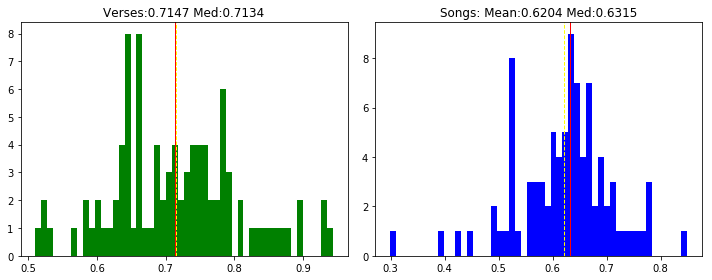

Chance


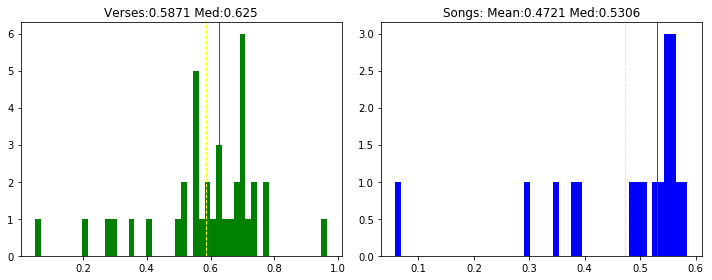

In [37]:
def quick_plot(artist_obj_list, all_feat_artist=True, b = 50):
    #good start, build on ideas from here
    #this is too messy for your final shit
    for art in artist_obj_list:
        #by verse
        uniq_vs = []
        for v in art.verses:
            if (art.name.lower() in v.label or re.match('[^a-z0-9](verse|bridge)[^a-z0-9]', v.label)) or all_feat_artist:
                uniq_vs.append(len(v.unique_words)/len(v.all_words))
        #by song
        uniq_ss = []
        for s in art.songs:
            one_song = set()
            one_song_all = []
            for seg in s.segments:
                if type(seg) == verse:
                    one_song = one_song|seg.unique_words
                    one_song_all.extend(seg.all_words)
            if one_song and one_song_all:
                uniq_ss.append(len(one_song)/len(one_song_all))
        print(art.name)
        
        #graphs
        rnd = 4
        fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))
        ax1.hist(uniq_vs, bins=b, color='green')
        ax1.axvline(mean(uniq_vs), color='yellow', linestyle='dashed', linewidth=1)
        ax1.axvline(median(uniq_vs), color='red', linestyle='solid', linewidth=1)
        ax1.set_title('Verses:'+str(round(mean(uniq_vs),rnd))+' Med:'+str(round(median(uniq_vs),rnd)))
        ax2.hist(uniq_ss, bins=b, color='blue')
        ax2.axvline(mean(uniq_ss), color='yellow', linestyle='dashed', linewidth=1)
        ax2.axvline(median(uniq_ss), color='red', linestyle='solid', linewidth=1)
        fig.tight_layout()
        ax2.set_title('Songs: Mean:'+str(round(mean(uniq_ss),rnd))+' Med:'+str(round(median(uniq_ss),rnd)))
        plt.show()
        #quick insight, leaving in [], "", () lowered chances avg
quick_plot(works.values(), all_feat_artist = False)

In [34]:
all_verses = []
yo = 'doom'
for v in works['MF Doom'].verses:
    #gotta double check this re but looks workings
    if yo in v.label or re.match('[^a-z0-9](verse|bridge)[^a-z0-9]', v.label):
        all_verses.append((len(v.unique_words)/len(v.all_words), v.content, v.label))
        
all_verses = sorted(all_verses, reverse=True)
print(len(all_verses))
for a in all_verses[:100]:
    print(a[0], a[2], a[1])
    print()

103
0.9428571428571428 [mf doom] 
on the strength, she wasn't lent three cent
got her own connect for free rent off the cement
now what if that was your moms short arms 
quarter waters to bottles of dom bought the {}



0.9333333333333333 [mf doom] 
just since some people, wear a mask
don't mean.. they.. did nothing automatically


now wait a second!
your honor i'd respectfully like to have a word with you in chambers



0.9333333333333333 [mf doom] 
just as the mask, some people wear a mask
don't mean that they did something 

0.896551724137931 [mf doom] 
it's like a jungle, 24/7, 365
.44, high score, guerilla war tour
yeah sure sure, when push comes to shove
it's well-done beef but it's still done love



0.8955223880597015 [mf doom] 
"duck season 3" officially in haters town
be sure to bring your maters call, and lazer sounds
they flied in, migrated, that's why i waited
the whole time eye and balls dilated
flier was faded, the date was right though
hoe it ain't nuttin but my hound d

what you did

literally two hours tix an insanneee verse bug
but, increased accuracy of unique words by a lot
revamped remove and reass method to be way more accurate/usable

what's next
make meta data calcs and graphing backend
possibly add that stuff to db (maybe)

possible ideas
when adding to json file, consider using the [artist] to store artist name
^ problems with this idea: sometimes it says verse, you have to basically segment all verses first
I think an easier way is to just use label == [mf doom] or verse regex when doing analysis - much easier with same effect 

In [7]:
#estconn.close()